<a href="https://colab.research.google.com/github/inagib21/BuildingPermitAnalysis/blob/main/Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import plotly.express as px

# Data Understanding:
**Cb No** Community Board

In [2]:

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
!gdown --id 16dH6ZQFAmIOAK4CWXfhn60fUVoGSbVkz

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=16dH6ZQFAmIOAK4CWXfhn60fUVoGSbVkz
To: /content/ApprovedPermits.csv
100% 213M/213M [00:02<00:00, 95.5MB/s]


In [4]:
# Read CSV file into a DataFrame
df = pd.read_csv('ApprovedPermits.csv')

<ipython-input-4-f5cea7a8267f>:2: DtypeWarning: Columns (9,15) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('ApprovedPermits.csv')


In [5]:
df.head()

Job Filing Number   Filing Reason House No       Street Name    Borough  \
0      M00671065-I1  Initial Permit       65  WEST   55 STREET  MANHATTAN   
1      B00768943-S5  Initial Permit       27       ARION PLACE   BROOKLYN   
2      Q00453643-I1  Initial Permit   100-15        194 STREET     QUEENS   
3      M08039802-I1  Initial Permit       10    DOWNING STREET  MANHATTAN   
4      M00674105-I1  Initial Permit      120       WALL STREET  MANHATTAN   

    LOT      Bin  Block  C B NO Apt/Condo No(s)  ...             Issued Date  \
0   7.0  1034818   1271   105.0             NaN  ...  02/02/2022 12:00:00 AM   
1  40.0  3326076   3136   304.0             NaN  ...  02/13/2023 12:00:00 AM   
2  22.0  4232167  10861   412.0             NaN  ...  07/13/2021 12:00:00 AM   
3  27.0  1008350    527   102.0             NaN  ...  02/07/2023 12:00:00 AM   
4   1.0  1000871     37   101.0             NaN  ...  02/14/2022 12:00:00 AM   

             Expired Date                                    Job Description  \
0  02/02/2023 05:00:00 AM  Installation of temporary sidewalk shed per pl...   
1  11/04/2023 11:00:00 PM  Fence application filed subsequent to Alt-CO, ...   
2  07/13/2022 04:00:00 AM  PROPOSED VERTICAL AND HORIZONTAL ENLARGEMENT, ...   
3  06/01/2023 12:00:00 AM  Removal of interior finishes and renovation of...   
4  04/01/2022 12:00:00 AM  Application filed to show AC unit specificatio...   

   Estimated Job Costs             Owner Business Name    Owner Name  \
0                  1.0            65 WEST PROPERTY LLC    DEAN PALIN   
1               1000.0  WATERFRONT PROPERTY MANAGEMENT  MOSES KARPEN   
2             408900.0                             NaN  LESTER HANNA   
3             200000.0       STONEHENGE MANAGEMENT LLC  ADAM GRUSHKO   
4               1000.0     SILVERSTEIN PROPERTIES INC.  BILL DACUNTO   

  Owner Street Address Owner City Owner State Owner Zip Code  
0                  NaN        NaN         NaN            NaN  
1                  NaN        NaN         NaN            NaN  
2                  NaN        NaN         NaN            NaN  
3                  NaN        NaN         NaN            NaN  
4                  NaN        NaN         NaN            NaN  

[5 rows x 35 columns]

In [6]:
#inspecting Dimensions
df.shape

(445019, 35)

In [7]:
#checking column info aswell as missing data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 445019 entries, 0 to 445018
Data columns (total 35 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   Job Filing Number                     445019 non-null  object 
 1   Filing Reason                         445019 non-null  object 
 2   House No                              445019 non-null  object 
 3   Street Name                           445019 non-null  object 
 4   Borough                               445019 non-null  object 
 5   LOT                                   444877 non-null  float64
 6   Bin                                   445019 non-null  int64  
 7   Block                                 445019 non-null  int64  
 8   C B NO                                444759 non-null  float64
 9   Apt/Condo No(s)                       1710 non-null    object 
 10  Work on Floor                         443100 non-null  object 
 11  

it seems that some of the columns in the DataFrame have no non-null values, which means that they contain no useful information for analysis. Here are the columns that have no non-null values:

Owner Street Address
Owner City
Owner State
Owner Zip Code
Filing Representative Middle Initial

 ### Cleaning [DOB](https://data.cityofnewyork.us/Housing-Development/DOB-NOW-Build-Approved-Permits/rbx6-tga4) dataset.

In [8]:
#Dropping columns with no values
df = df.drop(['Owner Street Address', 'Owner City', 'Owner State', 'Owner Zip Code', 'Filing Representative Middle Initial'], axis=1)


In [9]:
#Dropping columns with very small amount of values
df = df.drop(['Apt/Condo No(s)','Applicant Middle Name'],axis=1)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 445019 entries, 0 to 445018
Data columns (total 28 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   Job Filing Number                    445019 non-null  object 
 1   Filing Reason                        445019 non-null  object 
 2   House No                             445019 non-null  object 
 3   Street Name                          445019 non-null  object 
 4   Borough                              445019 non-null  object 
 5   LOT                                  444877 non-null  float64
 6   Bin                                  445019 non-null  int64  
 7   Block                                445019 non-null  int64  
 8   C B NO                               444759 non-null  float64
 9   Work on Floor                        443100 non-null  object 
 10  Work Type                            445019 non-null  object 
 11  Permittee's L

Lets continue dropping the columns which are irrelevant to our analysis

In [11]:
columns_to_drop = ['House No', 'Permittee\'s License Type', 'Applicant License #', 'Applicant First Name', 
                   'Applicant Last Name', 'Filing Representative First Name', 'Filing Representative Last Name',
                   'Applicant Business Address', 'Issued Date', 'Expired Date', 'Work Permit',
                   'Filing Representative Business Name','Owner Business Name','Owner Name','Applicant Business Name','Bin']

df = df.drop(columns=columns_to_drop)

In [12]:
# Check for NaN values
print(df.isnull().sum())

Job Filing Number         0
Filing Reason             0
Street Name               0
Borough                   0
LOT                     142
Block                     0
C B NO                  260
Work on Floor          1919
Work Type                 0
Approved Date            30
Job Description           1
Estimated Job Costs       1
dtype: int64


In [13]:
#Now we can drop any rows with missiing values
df = df.dropna()

In [14]:
df.shape

(442667, 12)

In [15]:
# Now we make sure columns are correct df type
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 442667 entries, 0 to 445018
Data columns (total 12 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Job Filing Number    442667 non-null  object 
 1   Filing Reason        442667 non-null  object 
 2   Street Name          442667 non-null  object 
 3   Borough              442667 non-null  object 
 4   LOT                  442667 non-null  float64
 5   Block                442667 non-null  int64  
 6   C B NO               442667 non-null  float64
 7   Work on Floor        442667 non-null  object 
 8   Work Type            442667 non-null  object 
 9   Approved Date        442667 non-null  object 
 10  Job Description      442667 non-null  object 
 11  Estimated Job Costs  442667 non-null  float64
dtypes: float64(3), int64(1), object(8)
memory usage: 43.9+ MB


In [16]:
# Convert date variables to datetime format
df['Approved Date'] = pd.to_datetime(df['Approved Date'])



In [17]:
# Extract features from date variables
df['Approved Year'] = df['Approved Date'].dt.year
df['Approved Month'] = df['Approved Date'].dt.month


In [18]:

# create correlation matrix
corr = df.corr()

fig = px.imshow(df.corr(), color_continuous_scale='RdBu', title='Correlation Heatmap')
fig.update_layout(template='plotly_dark', paper_bgcolor='rgba(0,0,0,0)', plot_bgcolor='rgba(0,0,0,0)',
                font=dict(color='black'))
fig.show()


<ipython-input-18-a0e7b0edeef7>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()
<ipython-input-18-a0e7b0edeef7>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  fig = px.imshow(df.corr(), color_continuous_scale='RdBu', title='Correlation Heatmap')


In [19]:
print(df['C B NO'].nunique())

71


In [20]:
# Now Lets convert our object columns that should be numbers
df['C B NO'] = pd.to_numeric(df['C B NO'], errors='coerce')



In [21]:
# Check for NaN values
print(df.isnull().sum())

Job Filing Number      0
Filing Reason          0
Street Name            0
Borough                0
LOT                    0
Block                  0
C B NO                 0
Work on Floor          0
Work Type              0
Approved Date          0
Job Description        0
Estimated Job Costs    0
Approved Year          0
Approved Month         0
dtype: int64


In [22]:
# We dont need this column
df = df.drop('Job Filing Number', axis=1)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 442667 entries, 0 to 445018
Data columns (total 13 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   Filing Reason        442667 non-null  object        
 1   Street Name          442667 non-null  object        
 2   Borough              442667 non-null  object        
 3   LOT                  442667 non-null  float64       
 4   Block                442667 non-null  int64         
 5   C B NO               442667 non-null  float64       
 6   Work on Floor        442667 non-null  object        
 7   Work Type            442667 non-null  object        
 8   Approved Date        442667 non-null  datetime64[ns]
 9   Job Description      442667 non-null  object        
 10  Estimated Job Costs  442667 non-null  float64       
 11  Approved Year        442667 non-null  int64         
 12  Approved Month       442667 non-null  int64         
dtypes: datetime64[

In [24]:
unique_work_types = df['Work Type'].unique()
print(unique_work_types)


['Sidewalk Shed' 'Construction Fence' 'Foundation' 'General Construction'
 'Mechanical Systems' 'Earth Work' 'Protection and Mechanical Methods'
 'Supported Scaffold' 'Sign' 'Plumbing' 'Sprinklers' 'Boiler Equipment'
 'Antenna' 'Structural' 'Support of Excavation' 'Curb Cut' 'Standpipe']


In [25]:
relevant_work_types = [
    "Foundation",
    "Mechanical Systems",
    "Earth Work",
    "Structural",
    "Support of Excavation",
]

filtered_df = df[df["Work Type"].isin(relevant_work_types)]

In [26]:
filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74632 entries, 2 to 445011
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Filing Reason        74632 non-null  object        
 1   Street Name          74632 non-null  object        
 2   Borough              74632 non-null  object        
 3   LOT                  74632 non-null  float64       
 4   Block                74632 non-null  int64         
 5   C B NO               74632 non-null  float64       
 6   Work on Floor        74632 non-null  object        
 7   Work Type            74632 non-null  object        
 8   Approved Date        74632 non-null  datetime64[ns]
 9   Job Description      74632 non-null  object        
 10  Estimated Job Costs  74632 non-null  float64       
 11  Approved Year        74632 non-null  int64         
 12  Approved Month       74632 non-null  int64         
dtypes: datetime64[ns](1), float64(

### [PLUTO](https://www.nyc.gov/site/planning/data-maps/open-data/dwn-pluto-mappluto.page) Data Cleaning

Mounting to Drive to get dataset



In [27]:
!gdown --id 1NBwjfiuO82CZvfH0TZ5FJFUO5UTBdWUb

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1NBwjfiuO82CZvfH0TZ5FJFUO5UTBdWUb
To: /content/pluto.csv
100% 386M/386M [00:04<00:00, 94.4MB/s]


In [28]:
# Read CSV file into a DataFrame
pluto_df = pd.read_csv('pluto.csv')

<ipython-input-28-556f9318be30>:2: DtypeWarning:

Columns (21,22,24,26,66) have mixed types. Specify dtype option on import or set low_memory=False.



In [29]:
pluto_df.head()

borough  block  lot     cd    bct2020     bctcb2020  ct2010  cb2010  \
0      BX   2286   24  201.0  2004100.0  2.004100e+10    41.0  2002.0   
1      BX   2286  103  201.0  2004100.0  2.004100e+10    41.0  2002.0   
2      MN   1249  146  107.0  1017500.0  1.017500e+10   175.0  2000.0   
3      MN   1249  149  107.0  1017500.0  1.017500e+10   175.0  2000.0   
4      BX   2737   20  202.0  2009301.0  2.009302e+10    93.0  1005.0   

   schooldist  council  ...  appbbl appdate  plutomapid  firm07_flag  \
0         7.0      8.0  ...     NaN     NaN           1          NaN   
1         7.0      8.0  ...     NaN     NaN           1          NaN   
2         3.0      6.0  ...     NaN     NaN           1          NaN   
3         3.0      6.0  ...     NaN     NaN           1          NaN   
4         8.0     17.0  ...     NaN     NaN           1          NaN   

   pfirm15_flag  version  dcpedited   latitude  longitude notes  
0           NaN     23v1        NaN  40.811035 -73.920172   NaN  
1           NaN     23v1        NaN  40.810700 -73.920132   NaN  
2           NaN     23v1          t  40.790541 -73.978310   NaN  
3           NaN     23v1          t  40.790642 -73.978556   NaN  
4           NaN     23v1        NaN  40.815670 -73.892287   NaN  

[5 rows x 92 columns]

In [30]:
pluto_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 859068 entries, 0 to 859067
Data columns (total 92 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   borough               859068 non-null  object 
 1   block                 859068 non-null  int64  
 2   lot                   859068 non-null  int64  
 3   cd                    857650 non-null  float64
 4   bct2020               857576 non-null  float64
 5   bctcb2020             857576 non-null  float64
 6   ct2010                857576 non-null  float64
 7   cb2010                857576 non-null  float64
 8   schooldist            856921 non-null  float64
 9   council               857509 non-null  float64
 10  zipcode               856905 non-null  float64
 11  firecomp              856902 non-null  object 
 12  policeprct            856916 non-null  float64
 13  healthcenterdistrict  856916 non-null  float64
 14  healtharea            856916 non-null  float64
 15  

In [31]:
# Mapping full names to abbreviations
borough_mapping = {
    'MN':'MANHATTAN',
    'BK':'BROOKLYN',
    'BX':'BRONX',
    'QN':'QUEENS',
    'SI':'STATEN ISLAND'
}

In [32]:
# Select the required columns
pluto_columns = ['Borough', 'Block', 'LOT', 'latitude', 'longitude', 
                 'bldgclass', 'landuse', 'yearbuilt', 'numfloors',
                 'unitsres', 'unitstotal', 'builtfar', 'residfar', 
                 'commfar', 'facilfar', 'zipcode', 'ownername']

# Rename columns in Pluto dataset
pluto_df_renamed = pluto_df.rename(columns={'borough': 'Borough', 'block': 'Block', 'lot': 'LOT'})

# Convert 'Borough' values in Pluto dataset to abbreviations
pluto_df_renamed['Borough'] = pluto_df_renamed['Borough'].map(borough_mapping)

# Merge the dataframes
merged_df = filtered_df.merge(pluto_df_renamed[pluto_columns], on=['Borough', 'Block', 'LOT'], how='left')


In [33]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74632 entries, 0 to 74631
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Filing Reason        74632 non-null  object        
 1   Street Name          74632 non-null  object        
 2   Borough              74632 non-null  object        
 3   LOT                  74632 non-null  float64       
 4   Block                74632 non-null  int64         
 5   C B NO               74632 non-null  float64       
 6   Work on Floor        74632 non-null  object        
 7   Work Type            74632 non-null  object        
 8   Approved Date        74632 non-null  datetime64[ns]
 9   Job Description      74632 non-null  object        
 10  Estimated Job Costs  74632 non-null  float64       
 11  Approved Year        74632 non-null  int64         
 12  Approved Month       74632 non-null  int64         
 13  latitude             72988 non-

# Exploritory Data Analysis:


In [34]:
#Resetting our index
filtered_df.set_index('Approved Date', inplace=True)
filtered_df.sort_index(inplace=True)

<ipython-input-34-57163a306e47>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [35]:
# Group by 'Borough', 'C B NO', and 'Approved Date', then resample by month
monthly_permits = filtered_df.groupby(['Borough', 'C B NO', pd.Grouper(freq='M')]).size().unstack().fillna(0)

# Find the community board with the least growth in permits over time in each borough
borough_cb_slow = monthly_permits.diff().sum(axis=1).groupby('Borough').idxmin()

# Print the results
for borough, (b, cb) in borough_cb_slow.items():
    print(f"The community board with the least growth in building permits in {borough} is: {cb}")


The community board with the least growth in building permits in BRONX is: 227.0
The community board with the least growth in building permits in BROOKLYN is: 307.0
The community board with the least growth in building permits in MANHATTAN is: 106.0
The community board with the least growth in building permits in QUEENS is: 408.0
The community board with the least growth in building permits in STATEN ISLAND is: 502.0


In [36]:
# Create a list to store the filtered data for each borough
filtered_data_list = []
# Filter the merged_df for each borough and the corresponding top community board
for borough, (b, cb) in borough_cb_slow.items():
    filtered_data = merged_df[(merged_df['Borough'] == borough) & (merged_df['C B NO'] == cb)]
    filtered_data_list.append(filtered_data)

# Concatenate the filtered data for all boroughs
filtered_data_combined = pd.concat(filtered_data_list)

# Create a choropleth map
fig = px.scatter_mapbox(filtered_data_combined, lat='latitude', lon='longitude', color='Borough', hover_data=['C B NO'],
                        mapbox_style='carto-positron', zoom=9)

fig.update_layout(title_text='Community Boards With Least Growth', title_x=0.5, mapbox_style="open-street-map")

fig.show()

In [37]:
# Group by 'Borough', 'C B NO', and 'Approved Date', then resample by month
monthly_permits = filtered_df.groupby(['Borough', 'C B NO', pd.Grouper(freq='M')]).size().unstack().fillna(0)

# Find the community board with the most growth in permits over time in each borough
borough_cb_growth = monthly_permits.diff().sum(axis=1).groupby('Borough').idxmax()

# Print the results
for borough, (b, cb) in borough_cb_growth.items():
    print(f"The community board with the most growth in building permits in {borough} is: {cb}")


The community board with the most growth in building permits in BRONX is: 204.0
The community board with the most growth in building permits in BROOKLYN is: 301.0
The community board with the most growth in building permits in MANHATTAN is: 105.0
The community board with the most growth in building permits in QUEENS is: 407.0
The community board with the most growth in building permits in STATEN ISLAND is: 501.0


In [38]:
# Create a list to store the filtered data for each borough
filtered_data_list = []
# Filter the merged_df for each borough and the corresponding top community board
for borough, (b, cb) in borough_cb_growth.items():
    filtered_data = merged_df[(merged_df['Borough'] == borough) & (merged_df['C B NO'] == cb)]
    filtered_data_list.append(filtered_data)

# Concatenate the filtered data for all boroughs
filtered_data_combined = pd.concat(filtered_data_list)

# Create a choropleth map
fig = px.scatter_mapbox(filtered_data_combined, lat='latitude', lon='longitude', color='Borough', hover_data=['C B NO'],
                        mapbox_style='carto-positron', zoom=9)

fig.update_layout(title_text='Community Boards With Highest Growth', title_x=0.5, mapbox_style="open-street-map")

fig.show()


In [39]:
# Aggregate the data
grouped_data = filtered_df['Borough'].value_counts().reset_index(name='Count')
grouped_data.columns = ['Borough', 'Count']

# Create the bar chart using Plotly Express
fig = px.bar(grouped_data, x='Borough', y='Count', title='Permits Issued by Borough')

# Customize the chart layout
fig.update_layout(
    plot_bgcolor='rgba(0, 0, 0, 0)',
    paper_bgcolor='rgba(0, 0, 0, 0)',
    font=dict(color='black'),
    xaxis=dict(showgrid=True, gridcolor='black'),
    yaxis=dict(showgrid=True, gridcolor='black')
)

# Show the chart
fig.show()


In [40]:
# Aggregate the data
grouped_data = filtered_df.groupby(['Borough', 'Work Type']).size().reset_index(name='Count')

# Create the bar chart using Plotly Express
fig = px.bar(grouped_data, x='Work Type', y='Count', color='Borough', title='Permits Issued by Work Type and Borough')

# Customize the chart layout
fig.update_layout(
    plot_bgcolor='rgba(0, 0, 0, 0)',
    paper_bgcolor='rgba(0, 0, 0, 0)',
    font=dict(color='black'),
    xaxis=dict(showgrid=True, gridcolor='black'),
    yaxis=dict(showgrid=True, gridcolor='black')
)

# Show the chart
fig.show()


In [41]:
# Aggregate the data
grouped_data = filtered_df.groupby('Work Type')['Estimated Job Costs'].mean().reset_index(name='Average Estimated Job Costs')

# Create the bar chart using Plotly Express
fig = px.bar(grouped_data, x='Work Type', y='Average Estimated Job Costs', title='Average Estimated Job Costs by Work Type')

# Customize the chart layout
fig.update_layout(
    plot_bgcolor='rgba(0, 0, 0, 0)',
    paper_bgcolor='rgba(0, 0, 0, 0)',
    font=dict(color='black'),
    xaxis=dict(showgrid=True, gridcolor='black'),
    yaxis=dict(showgrid=True, gridcolor='black')
)

# Show the chart
fig.show()



In [42]:
# Aggregate the data
grouped_data = filtered_df.groupby(['Approved Year', 'Approved Month']).size().reset_index(name='Count')

# Create a new column for year-month combination
grouped_data['Year-Month'] = grouped_data['Approved Year'].astype(str) + '-' + grouped_data['Approved Month'].astype(str)

# Create the line chart using Plotly Express
fig = px.line(grouped_data, x='Year-Month', y='Count', title='Total Permits Issued by Month and Year')

# Customize the chart layout
fig.update_layout(
    plot_bgcolor='rgba(0, 0, 0, 0)',
    paper_bgcolor='rgba(0, 0, 0, 0)',
    font=dict(color='black'),
    xaxis=dict(showgrid=True, gridcolor='black'),
    yaxis=dict(showgrid=True, gridcolor='black')
)

# Show the chart
fig.show()


In [43]:
# Aggregate the data
grouped_data = filtered_df.groupby(['Approved Year', 'Approved Month', 'Work Type']).size().reset_index(name='Count')

# Create a new column for year-month combination
grouped_data['Year-Month'] = grouped_data['Approved Year'].astype(str) + '-' + grouped_data['Approved Month'].astype(str)

# Create the line chart using Plotly Express
fig = px.line(grouped_data, x='Year-Month', y='Count', color='Work Type', title='Permits Issued by Work Type and Month-Year')

# Customize the chart layout
fig.update_layout(
    plot_bgcolor='rgba(0, 0, 0, 0)',
    paper_bgcolor='rgba(0, 0, 0, 0)',
    font=dict(color='black'),
    xaxis=dict(showgrid=True, gridcolor='black'),
    yaxis=dict(showgrid=True, gridcolor='black')
)

# Show the chart
fig.show()


In [44]:
# Aggregate the data
grouped_data = filtered_df.groupby('Work Type')['Estimated Job Costs'].sum().reset_index(name='Total Estimated Job Costs')

# Create the bar chart using Plotly Express
fig = px.bar(grouped_data, x='Work Type', y='Total Estimated Job Costs', title='Total Estimated Job Costs by Work Type')

# Customize the chart layout
fig.update_layout(
    plot_bgcolor='rgba(0, 0, 0, 0)',
    paper_bgcolor='rgba(0, 0, 0, 0)',
    font=dict(color='black'),
    xaxis=dict(showgrid=True, gridcolor='black'),
    yaxis=dict(showgrid=True, gridcolor='black')
)

# Show the chart
fig.show()


In [45]:
boroughs = filtered_df['Borough'].unique()

for borough in boroughs:
    # Filter the data for the current borough
    borough_data = filtered_df[filtered_df['Borough'] == borough]
    
    # Aggregate the data
    grouped_data = borough_data['Work Type'].value_counts().reset_index(name='Count')
    grouped_data.columns = ['Work Type', 'Count']

    # Create the bar chart using Plotly Express
    fig = px.bar(grouped_data, x='Work Type', y='Count', title=f'Permits Issued by Work Type in {borough}')

    # Customize the chart layout
    fig.update_layout(
        plot_bgcolor='rgba(0, 0, 0, 0)',
        paper_bgcolor='rgba(0, 0, 0, 0)',
        font=dict(color='black'),
        xaxis=dict(showgrid=True, gridcolor='black'),
        yaxis=dict(showgrid=True, gridcolor='black')
    )

    # Show the chart
    fig.show()


In [46]:
from sklearn.model_selection import train_test_split



In [47]:
from sklearn.metrics import mean_absolute_error, mean_squared_error 



the MAE (Mean Absolute Error) measures the average absolute difference between the predicted values and the true values for each work type. So, a smaller MAE value indicates a better fit of the model.

The MSE (Mean Squared Error) measures the average squared difference between the predicted values and the true values for each work type. So, a smaller MSE value indicates a better fit of the model, and the values are on a larger scale than MAE.

Looking at the results, we can see that the Earth Work and Support of Excavation work types have the lowest MAE scores, indicating that the model was able to predict these types of work more accurately. On the other hand, the General Construction work type has the highest MAE score, indicating that the model was less accurate in predicting this type of work.

For MSE scores, we can see that the Earth Work and Support of Excavation work types have the lowest MSE scores, indicating that the model was able to predict these types of work more accurately with smaller error. However, General Construction work type has the highest MSE score, indicating that the model was less accurate in predicting this type of work with larger error.

In [48]:

# Create separate plots for each borough
for borough in boroughs:
    # Filter the data to only include the relevant borough
    borough_data = filtered_df[filtered_df['Borough'] == borough]

    # Group the data by Approved Year and C B NO and count the number of permits for each group
    cb_data = borough_data.groupby(['Approved Year', 'C B NO']).size().reset_index(name='Count')

    # Create the line chart using Plotly Express
    fig = px.line(cb_data, x=['Approved Year', 'C B NO'], y='Count', color='C B NO', title=f'Permits Issued by Community Board and Year in {borough}',
                  )

    # Customize the chart layout
    fig.update_layout(xaxis_title='Year', yaxis_title='Permits Issued', legend_title='Community Board',
                      title_font_color='black', font_color='black', 
                      plot_bgcolor='rgba(0, 0, 0, 0)',
                      paper_bgcolor='rgba(0, 0, 0, 0)',
                      xaxis=dict(showgrid=True, gridcolor='black'),
        yaxis=dict(showgrid=True, gridcolor='black')
    )

    # Show the chart
    fig.show()



In [49]:
# Create separate plots for each borough
for borough in boroughs:
    # Filter the data to only include the relevant borough
    borough_data = merged_df[merged_df['Borough'] == borough]

    # Group the data by 'bldgclass' and count the number of instances
    class_data = borough_data.groupby('bldgclass').size().reset_index(name='Count')

    # Sort the data by count in descending order and select the top 5
    class_data = class_data.sort_values(by='Count', ascending=False).head(5)

    # Create the bar chart using Plotly Express
    fig = px.bar(class_data, x='bldgclass', y='Count', title=f'Top 5 Building Class Distribution in {borough}',
                  )

    # Customize the chart layout
    fig.update_layout(xaxis_title='Building Class', yaxis_title='Count',
                      title_font_color='black', font_color='black', 
                      plot_bgcolor='rgba(0, 0, 0, 0)',
                      paper_bgcolor='rgba(0, 0, 0, 0)',
                      xaxis=dict(showgrid=True, gridcolor='black'),
                      yaxis=dict(showgrid=True, gridcolor='black')
    )

    # Show the chart
    fig.show()


In [50]:

# Define the top community boards in each borough
top_cb = {'BRONX': 204.0, 'BROOKLYN': 301.0, 'MANHATTAN': 105.0, 'QUEENS': 407.0, 'STATEN ISLAND': 501.0}

# Create separate plots for each borough
for borough, cb_no in top_cb.items():
    # Filter the data to only include the relevant borough and community board
    cb_data = merged_df[(merged_df['Borough'] == borough) & (merged_df['C B NO'] == cb_no)]

    # Group the data by 'bldgclass' and count the number of instances
    class_data = cb_data.groupby('bldgclass').size().reset_index(name='Count')

    # Sort the data by count in descending order and select the top 5
    class_data = class_data.sort_values(by='Count', ascending=False).head(5)

    # Create the bar chart using Plotly Express
    fig = px.bar(class_data, x='bldgclass', y='Count', title=f'Top 5 Building Class Distribution in {borough} Community Board {int(cb_no)}',
                  )

    # Customize the chart layout
    fig.update_layout(xaxis_title='Building Class', yaxis_title='Count',
                      title_font_color='black', font_color='black', 
                      plot_bgcolor='rgba(0, 0, 0, 0)',
                      paper_bgcolor='rgba(0, 0, 0, 0)',
                      xaxis=dict(showgrid=True, gridcolor='black'),
                      yaxis=dict(showgrid=True, gridcolor='black')
    )

    # Show the chart
    fig.show()


Building Class Explanation:  

here's a brief explanation of the top building classes in each borough according to the NYC building code definitions:

BRONX, Community Board 204:

D1: Elevator apartment; semi-fireproof (without stores)
C1: Walk-up apartment; over six families without stores
D7: Elevator apartment; semi-fireproof with stores
B1: Two-family brick building
K1: One-story retail building

BROOKLYN, Community Board 301:

C0: Walk-up apartment; three families 
B9: Two-family miscellaneous
RM: Residential multiple use (primarily residential with some commercial)
V1: Garage; two stories or less (commercial)
C1: Walk-up apartment; over six families without stores

MANHATTAN, Community Board 105:

O4: Office building; 20 Stories or more
O6: Office building; 7-19 stories
RC: Residential building with commercial units
RM: Residential multiple use (primarily residential with some commercial)
K4: Store Building; Predomanet retail with other uses.

QUEENS, Community Board 407:

A1: One-family house; two stories detached
B3: Two-family house; semi-attached
A3: Large Suburban Residence
A2: One-family house; one story permanent living quarter
B1: Two-family brick building

STATEN ISLAND, Community Board 501:

A1: One-family house; two stories detached
B2: Two-family house; detached
V0: Garage or gas station; one story
A5: One-family house; attached or semi-detached
K6: Shopping center with multiple stores (with or without parking)


## Location Recommendations:
**Location Recommendations:**
Based on building permit growth, we've identified top-performing community boards within each NYC borough. Here are compelling reasons to consider them for your next investment:

**Brooklyn (CB 301.0 - includes neighborhoods like Williamsburg):** Known for its diverse culture and creative energy, Brooklyn's rapid development signals a thriving real estate market. Top building types include walk-up apartments and two-family houses, catering to a vibrant mix of residents. Commercial garages also feature prominently, highlighting the need for commercial real estate infrastructure in this bustling borough.

**Bronx (CB 204.0 - includes neighborhoods like Highbridge, Concourse):** Offering affordable real estate options and excellent connectivity, the Bronx is an emerging market with untapped potential. With a high prevalence of apartment buildings, both with and without stores, there's a strong potential for residential and mixed-use buildings. Two-family brick buildings and one-story retail buildings are also common, further enhancing the appeal of this dynamic borough.

**Manhattan (CB 105.0 - includes neighborhoods like Times Square, Theater District):** At the heart of NYC, Manhattan provides prestigious real estate opportunities with potential for attractive returns. The popularity of office buildings and residential buildings with commercial units suggests a high demand for mixed-use properties. Big-box stores also feature, pointing to lucrative opportunities in the retail sector.

**Queens (CB 407.0 - includes neighborhoods like Flushing, Whitestone):** Renowned for its cultural diversity and dynamic economy, Queens presents a chance to cater to varied demographics in a growing market. One-family houses, both detached and semi-detached, and two-family semi-attached houses dominate, making this borough ideal for family-oriented residential developments. Brick buildings and garages or gas stations also feature, offering diverse investment opportunities.

**Staten Island (CB 501.0 - includes neighborhoods like St. George, Tompkinsville):** Offering suburban charm and scenic landscapes, Staten Island is perfect for family-oriented investments, with opportunities for waterfront properties. Detached one-family and two-family houses are popular, reinforcing the borough's appeal for families. One-story garages or gas stations and shopping centers also feature, indicating a need for commercial infrastructure.

Remember, these community boards can serve as focal points to explore surrounding neighborhoods for further opportunities. Thorough market research and consideration of individual investment goals and risk tolerance are essential before making any investment decisions.

## Lead list For Old Buildings


As a real estate developer or investor, having access to a curated list of potential leads for old buildings can provide valuable insights into investment opportunities. In this regard, the old_buildings_df DataFrame proves to be an invaluable resource. It encompasses key information such as the owner's name, community board, building age, and other pertinent details. Notably, all the buildings listed were constructed prior to 1940, offering a unique opportunity to explore historical properties with significant potential for redevelopment.



In [51]:
# Step 1: Identify zipcodes of top-performing community boards
top_cb_zipcodes = merged_df[merged_df['C B NO'].isin([301, 204, 105, 407, 501])]['zipcode'].unique()

# Step 2: Filter `pluto_df` to include only buildings in these zipcodes
filtered_pluto_df = pluto_df[pluto_df['zipcode'].isin(top_cb_zipcodes)]

# Step 3: Identify old buildings, e.g., buildings built before 1940
old_buildings_df = filtered_pluto_df[filtered_pluto_df['yearbuilt'] < 1940]


In [52]:
old_buildings_df.to_csv('old_buildings_leads.csv', index=False)

In [53]:
# First, find the most common 'C B NO' for each zip code in the merged_df DataFrame
most_common_cb = merged_df.groupby('zipcode')['C B NO'].agg(lambda x:x.value_counts().index[0]).reset_index()

# Convert this DataFrame to a dictionary
most_common_cb_dict = most_common_cb.set_index('zipcode')['C B NO'].to_dict()

# Then, map this dictionary to the 'zipcode' column in the pluto_df DataFrame
pluto_df['C B NO'] = pluto_df['zipcode'].map(most_common_cb_dict)




In [54]:
# Filter `pluto_df` to include only buildings in top-performing community boards
filtered_pluto_df = pluto_df[pluto_df['C B NO'].isin([301, 204, 105, 407, 501])]

# Drop NA values in the 'yearbuilt' column
filtered_pluto_df = filtered_pluto_df.dropna(subset=['yearbuilt'])

# Create a new column 'Decade' by binning the year built into decades
filtered_pluto_df['Decade'] = (10 * (filtered_pluto_df['yearbuilt'] // 10)).astype(int)

# Group by community board and Decade to see the distribution
decade_distribution = filtered_pluto_df.groupby(['C B NO', 'Decade']).size().reset_index(name='Count')




In [55]:


def plot_building_age_distribution(decade_distribution, cb=None, borough=None):
    if cb is not None:
        # Filter the dataframe for the specified community board
        df_cb = decade_distribution[decade_distribution['C B NO'] == cb]
        title = f'Building Age Distribution in Community Board {cb}'
    elif borough is not None:
        # Filter the dataframe for the specified borough
        df_cb = decade_distribution[decade_distribution['borough'] == borough]
        title = f'Building Age Distribution in {borough} Borough'
    else:
        raise ValueError('Please specify either the community board number (cb) or the borough name.')
    
    # Sort the 'Decade' column in ascending order
    df_cb['Decade'] = df_cb['Decade'].astype(int)
    df_cb = df_cb.sort_values('Decade')
    # Drop rows with 0 values in the 'Count' column
    df_cb = df_cb[(df_cb['Count'] != 0) & (df_cb['Decade'] > 0)]
    # Create the bar plot
    fig = px.bar(df_cb, x='Decade', y='Count', labels={'Decade':'Decade Built', 'Count':'Number of Buildings'},
                 title=title,
                 template='plotly_dark')
    # Set the background color to transparent and text color to black
    fig.update_layout(
        plot_bgcolor='rgba(0,0,0,0)',
        paper_bgcolor='rgba(0,0,0,0)',
        font_color='black'
    )
    # Show the plot
    fig.show()

In [56]:
# Call the function by specifying the community board number
plot_building_age_distribution(decade_distribution, cb=top_cb['BROOKLYN'])

<ipython-input-55-3b281482de1c>:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [57]:
# Call the function by specifying the community board number
plot_building_age_distribution(decade_distribution, cb=top_cb['BRONX'])

<ipython-input-55-3b281482de1c>:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [58]:
# Call the function by specifying the community board number
plot_building_age_distribution(decade_distribution, cb=top_cb['MANHATTAN'])

<ipython-input-55-3b281482de1c>:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [59]:
# Call the function by specifying the community board number
plot_building_age_distribution(decade_distribution, cb=top_cb['QUEENS'])

<ipython-input-55-3b281482de1c>:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [60]:
# Call the function by specifying the community board number
plot_building_age_distribution(decade_distribution, cb=top_cb['STATEN ISLAND'])

<ipython-input-55-3b281482de1c>:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



# Old Building Mantainence Prediction


In [77]:
# Rename columns in old building dataset
old_buildings_df = old_buildings_df.rename(columns={'borough': 'Borough', 'block': 'Block', 'lot': 'LOT'})

# Convert 'Borough' values in Pluto dataset to abbreviations
old_buildings_df['Borough'] = old_buildings_df['Borough'].map(borough_mapping)

In [79]:

# Merge the old_buildings_df and df using a left join
old_df = pd.merge(old_buildings_df, df, how='left', left_on=['Borough', 'Block', 'LOT'], right_on=['Borough', 'Block', 'LOT'])


In [80]:
old_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 137908 entries, 0 to 137907
Columns: 102 entries, Borough to Approved Month
dtypes: datetime64[ns](1), float64(64), int64(4), object(33)
memory usage: 108.4+ MB


In [81]:
old_df.head()

Borough  Block  LOT     cd    bct2020     bctcb2020  ct2010  cb2010  \
0  QUEENS   5211   14  407.0  4120500.0  4.120500e+10  1205.0  1007.0   
1  QUEENS   5211   15  407.0  4120500.0  4.120500e+10  1205.0  1007.0   
2  QUEENS   2008   61  404.0  4042700.0  4.042700e+10   427.0  2001.0   
3  QUEENS   2008   83  404.0  4042700.0  4.042700e+10   439.0  2001.0   
4  QUEENS   2009   70  404.0  4042700.0  4.042700e+10   427.0  2002.0   

   schooldist  council  ...  Filing Reason Street Name  C B NO  Work on Floor  \
0        25.0     20.0  ...            NaN         NaN     NaN            NaN   
1        25.0     20.0  ...            NaN         NaN     NaN            NaN   
2        24.0     21.0  ...            NaN         NaN     NaN            NaN   
3        24.0     21.0  ...            NaN         NaN     NaN            NaN   
4        24.0     21.0  ...            NaN         NaN     NaN            NaN   

   Work Type  Approved Date  Job Description Estimated Job Costs  \
0        NaN            NaT              NaN                 NaN   
1        NaN            NaT              NaN                 NaN   
2        NaN            NaT              NaN                 NaN   
3        NaN            NaT              NaN                 NaN   
4        NaN            NaT              NaN                 NaN   

  Approved Year Approved Month  
0           NaN            NaN  
1           NaN            NaN  
2           NaN            NaN  
3           NaN            NaN  
4           NaN            NaN  

[5 rows x 102 columns]

In [82]:
# Get a list of numerical column names
num_features = old_df.select_dtypes(include=[np.number]).columns.tolist()

# Get a list of categorical column names
cat_features = old_df.select_dtypes(exclude=[np.number, 'datetime64[ns]']).columns.tolist()

print("Numerical features:", num_features)
print("Categorical features:", cat_features)


Numerical features: ['Block', 'LOT', 'cd', 'bct2020', 'bctcb2020', 'ct2010', 'cb2010', 'schooldist', 'council', 'zipcode', 'policeprct', 'healthcenterdistrict', 'healtharea', 'sanitboro', 'sanitdistrict', 'spdist3', 'landuse', 'easements', 'lotarea', 'bldgarea', 'comarea', 'resarea', 'officearea', 'retailarea', 'garagearea', 'strgearea', 'factryarea', 'otherarea', 'areasource', 'numbldgs', 'numfloors', 'unitsres', 'unitstotal', 'lotfront', 'lotdepth', 'bldgfront', 'bldgdepth', 'proxcode', 'lottype', 'bsmtcode', 'assessland', 'assesstot', 'exempttot', 'yearbuilt', 'yearalter1', 'yearalter2', 'builtfar', 'residfar', 'commfar', 'facilfar', 'borocode', 'bbl', 'condono', 'tract2010', 'xcoord', 'ycoord', 'taxmap', 'appbbl', 'plutomapid', 'firm07_flag', 'pfirm15_flag', 'latitude', 'longitude', 'notes', 'C B NO', 'Estimated Job Costs', 'Approved Year', 'Approved Month']
Categorical features: ['Borough', 'firecomp', 'sanitsub', 'address', 'zonedist1', 'zonedist2', 'zonedist3', 'zonedist4', 'ove

In [83]:
categorical_features = [col for col in old_df.columns if old_df[col].dtype == 'object']
print(old_df[categorical_features].isna().sum())



Borough                 0
firecomp             3077
sanitsub             3102
address                 0
zonedist1            2656
zonedist2          125535
zonedist3          137487
zonedist4          137907
overlay1           124598
overlay2           137782
spdist1            107127
spdist2            137862
ltdheight          137740
splitzone            2656
bldgclass               0
ownertype          123838
ownername             253
ext                 24388
irrlotcode              0
histdist           121673
landmark           130518
zonemap              2614
zmcode             133998
sanborn              2407
edesignum          131646
appdate            123020
version                 0
dcpedited          123524
Filing Reason       65790
Street Name         65790
Work on Floor       65790
Work Type           65790
Job Description     65790
dtype: int64


In [66]:

# Fill missing values in categorical columns with mode, if it exists, else with 'Unknown'
for col in categorical_features:
    if old_df[col].mode().empty:
        old_df[col] = old_df[col].fillna('Unknown')
    else:
        old_df[col] = old_df[col].fillna(old_df[col].mode()[0])

# Check if there are any missing values left
print(old_df.isnull().sum().sum())



1106476


In [84]:
# Find constant columns
constant_columns = old_df.columns[old_df.nunique() == 1]

print("Constant columns: ", constant_columns)


Constant columns:  Index(['zonedist4', 'ltdheight', 'zmcode', 'firm07_flag', 'pfirm15_flag',
       'version', 'dcpedited'],
      dtype='object')


The columns listed here have only one unique value in our dataset. These columns are constant and don't provide any variability in the data. As such, they don't contribute useful information for modeling, and they can be safely removed from the dataset.

In [85]:
# Drop constant columns
old_df = old_df.drop(columns=constant_columns)


### Principal Component Analysis (PCA)

In [88]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer

# List of numerical features
numerical_features = ['Block', 'LOT', 'cd', 'bct2020', 'bctcb2020', 'ct2010', 'cb2010',
                      'schooldist', 'council', 'zipcode', 'policeprct', 'healthcenterdistrict',
                      'healtharea', 'sanitboro', 'sanitdistrict', 'spdist3', 'landuse', 'easements',
                      'lotarea', 'bldgarea', 'comarea', 'resarea', 'officearea', 'retailarea', 'garagearea',
                      'strgearea', 'factryarea', 'otherarea', 'areasource', 'numbldgs', 'numfloors', 'unitsres',
                      'unitstotal', 'lotfront', 'lotdepth', 'bldgfront', 'bldgdepth', 'proxcode', 'lottype',
                      'bsmtcode', 'assessland', 'assesstot', 'exempttot', 'yearbuilt', 'yearalter1', 'yearalter2',
                      'builtfar', 'residfar', 'commfar', 'facilfar', 'borocode', 'bbl', 'condono', 'tract2010',
                      'xcoord', 'ycoord', 'taxmap', 'appbbl', 'plutomapid', 'latitude', 'longitude', 'notes',
                      'LOT', 'Block', 'C B NO', 'Estimated Job Costs', 'Approved Year', 'Approved Month']


# Scale the numerical features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(old_df[numerical_features])

# Create an imputer object with a median filling strategy
imputer = SimpleImputer(strategy='median')

# Fit on the data and transform the data
scaled_data_imputed = imputer.fit_transform(scaled_data)

# Apply PCA
pca = PCA(n_components=0.95)  # 0.95 means that we want to keep 95% of the variance
pca_data = pca.fit_transform(scaled_data_imputed)

print(f"Original shape: {scaled_data_imputed.shape}, reduced shape: {pca_data.shape}")


/usr/local/lib/python3.10/dist-packages/sklearn/utils/extmath.py:1047: RuntimeWarning:

invalid value encountered in true_divide

/usr/local/lib/python3.10/dist-packages/sklearn/utils/extmath.py:1052: RuntimeWarning:

invalid value encountered in true_divide

/usr/local/lib/python3.10/dist-packages/sklearn/utils/extmath.py:1072: RuntimeWarning:

invalid value encountered in true_divide



Original shape: (137908, 66), reduced shape: (137908, 31)


In [89]:


# Create a DataFrame for the first two principal components
df_pca = pd.DataFrame(pca_data[:, :2], columns=['PC1', 'PC2'])

# Create a scatter plot
fig = px.scatter(df_pca, x='PC1', y='PC2')

# Customize the layout
fig.update_layout(
    plot_bgcolor='rgba(0,0,0,0)',  # Transparent background
    paper_bgcolor='rgba(0,0,0,0)',  # Transparent background
    font=dict(color='black')  # Black text
)

fig.show()


### Understanding Our Target Variable:
the recent_permit column is a binary variable that represents whether a building has had a permit approved after the date defined by recent_threshold (January 1, 2018).

The values in this column are:

1: This means that the building has had a permit approved after January 1, 2018. In other words, it has had a recent permit or recent renovation.

0: This means that the building has not had a permit approved after January 1, 2018. So, it has not had a recent renovation.

In [93]:
# Set a threshold for the recent permit
recent_threshold = pd.to_datetime('2018-01-01')

In [94]:
# Create a new column 'recent_permit', set it to 1 if the building has had a permit approved after the recent_threshold, and 0 otherwise
old_df['recent_permit'] = (old_df['Approved Date'] > recent_threshold).astype(int)

In [99]:
print(old_df['recent_permit'].value_counts())

1    71172
0    66736
Name: recent_permit, dtype: int64


In [98]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Create a train-test split
X_train, X_test, y_train, y_test = train_test_split(pca_data, old_df['recent_permit'], test_size=0.2, random_state=42)

# Create a pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', LogisticRegression())
])

# Fit the pipeline on the training data
pipeline.fit(X_train, y_train)

# Evaluate the pipeline on the test data
score = pipeline.score(X_test, y_test)

print(f"Test accuracy: {score*100:.2f}%")


Test accuracy: 95.46%


In [102]:
from sklearn.metrics import confusion_matrix, classification_report

# Use the trained model to make predictions on the test set
y_pred = pipeline.predict(X_test)

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=[0, 1])

# Print the confusion matrix with labels
cm_df = pd.DataFrame(cm, index=['No Recent Renovation (0)', 'Recent Renovation (1)'], 
                     columns=['Predicted No Recent Renovation (0)', 'Predicted Recent Renovation (1)'])

# Generate and print the classification report
report = classification_report(y_test, y_pred, target_names=['No Recent Renovation (0)', 'Recent Renovation (1)'])



### Logistic Regression With PCA Results:

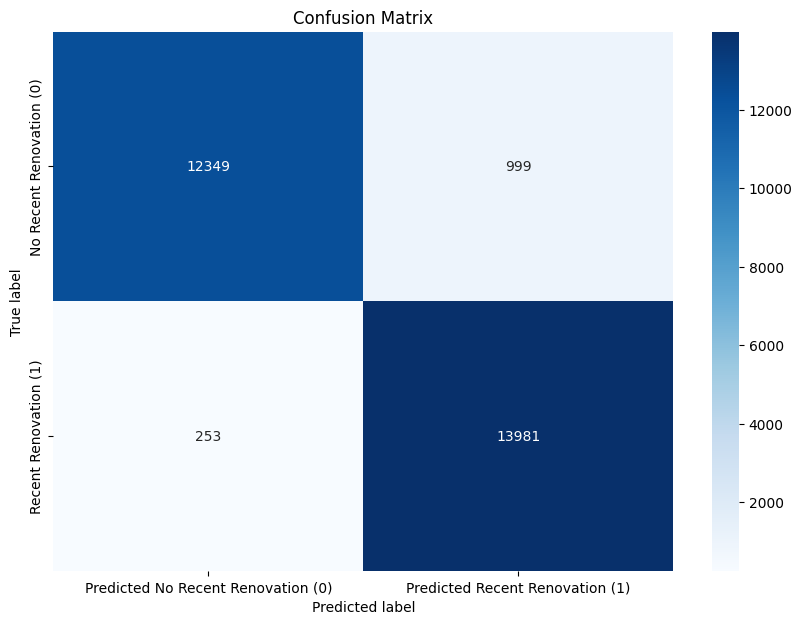

                          precision    recall  f1-score   support

No Recent Renovation (0)       0.98      0.93      0.95     13348
   Recent Renovation (1)       0.93      0.98      0.96     14234

                accuracy                           0.95     27582
               macro avg       0.96      0.95      0.95     27582
            weighted avg       0.96      0.95      0.95     27582



In [103]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the confusion matrix
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Predicted No Recent Renovation (0)', 'Predicted Recent Renovation (1)'],
            yticklabels=['No Recent Renovation (0)', 'Recent Renovation (1)'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix')
plt.show()
 
print(report) 


The model's accuracy is 95%, which means it correctly predicts whether a building has had recent renovation or not 95% of the time. This high accuracy indicates strong performance, which can aid our real estate investment firm in decision making.

The high precision (98% for no recent renovation, 93% for recent renovation) means the model is reliable when it predicts a renovation status. The high recall (93% for no recent renovation, 98% for recent renovation) suggests the model is good at identifying buildings that have had renovations or not.

The balanced F1-score of 95% for both classes suggests that the model doesn't favor one class over the other. Hence, it can be trusted to make balanced decisions between recently renovated and not recently renovated buildings. This is beneficial for our firm as it can help in accurate identification of properties, thereby aiding in profitable investment decisions.






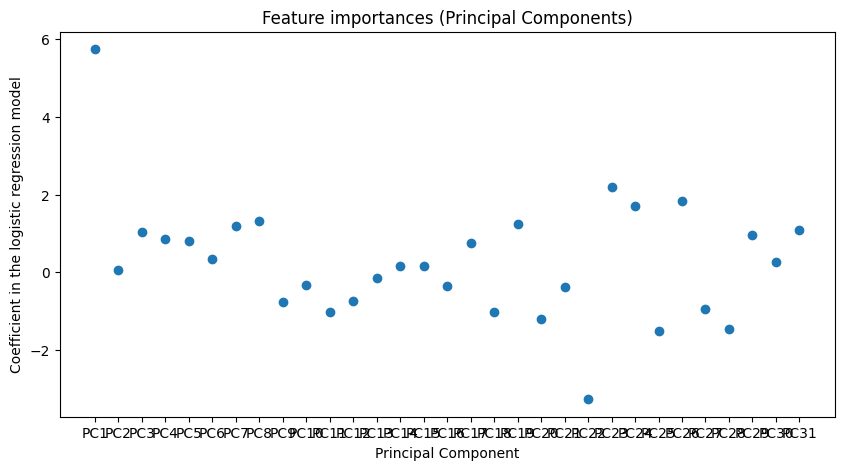

In [121]:
# get the coefficients of the logistic regression model
coefficients = pipeline.named_steps['classifier'].coef_[0]

# plot the coefficients
plt.figure(figsize=(10, 5))
plt.plot(coefficients, 'o')
plt.xticks(np.arange(len(coefficients)), labels=['PC' + str(i) for i in range(1, len(coefficients) + 1)])
plt.title('Feature importances (Principal Components)')
plt.xlabel('Principal Component')
plt.ylabel('Coefficient in the logistic regression model')
plt.show()


### Logistic Regression Without PCA

In [123]:

# Preprocessing: Scale and impute the numerical features
scaled_data = scaler.fit_transform(old_df[numerical_features])
imputed_data = imputer.fit_transform(scaled_data)

# Create a train-test split
X_train, X_test, y_train, y_test = train_test_split(imputed_data, old_df['recent_permit'], test_size=0.2, random_state=42)

# Create a pipeline without PCA
pipeline_no_pca = Pipeline([
    ('classifier', LogisticRegression())
])

# Fit the pipeline on the training data
pipeline_no_pca.fit(X_train, y_train)

# Evaluate the pipeline on the test data
score_no_pca = pipeline_no_pca.score(X_test, y_test)

print(f"Test accuracy without PCA: {score_no_pca*100:.2f}%")

/usr/local/lib/python3.10/dist-packages/sklearn/utils/extmath.py:1047: RuntimeWarning:

invalid value encountered in true_divide

/usr/local/lib/python3.10/dist-packages/sklearn/utils/extmath.py:1052: RuntimeWarning:

invalid value encountered in true_divide

/usr/local/lib/python3.10/dist-packages/sklearn/utils/extmath.py:1072: RuntimeWarning:

invalid value encountered in true_divide



Test accuracy without PCA: 95.87%


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



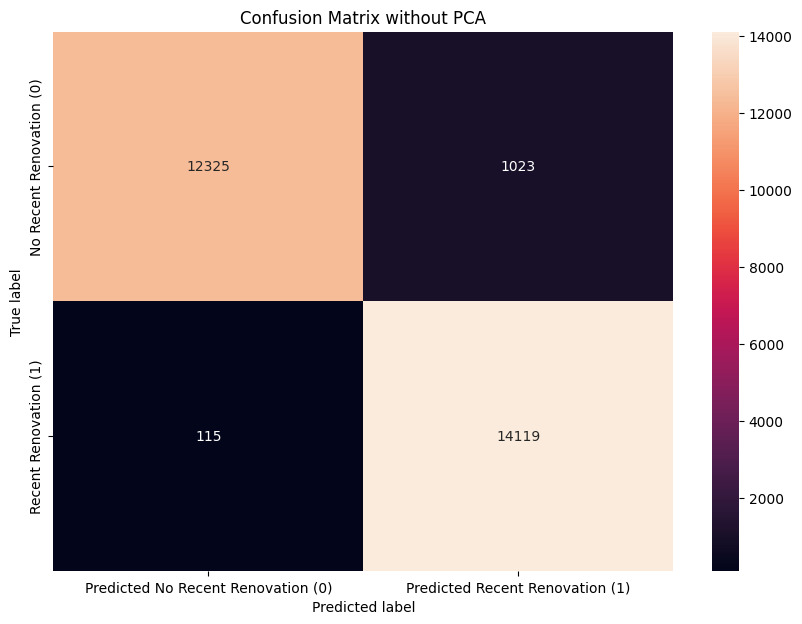

                          precision    recall  f1-score   support

No Recent Renovation (0)       0.99      0.92      0.96     13348
   Recent Renovation (1)       0.93      0.99      0.96     14234

                accuracy                           0.96     27582
               macro avg       0.96      0.96      0.96     27582
            weighted avg       0.96      0.96      0.96     27582



In [125]:

# Use the trained model to make predictions on the test set
y_pred_no_pca = pipeline_no_pca.predict(X_test)

# Generate the confusion matrix
cm_no_pca = confusion_matrix(y_test, y_pred_no_pca, labels=[0, 1])

# Generate and print the classification report
report_no_pca = classification_report(y_test, y_pred_no_pca, target_names=['No Recent Renovation (0)', 'Recent Renovation (1)'])


# Create a DataFrame from the confusion matrix.
cm_df_no_pca = pd.DataFrame(cm_no_pca, index=['No Recent Renovation (0)', 'Recent Renovation (1)'], 
                     columns=['Predicted No Recent Renovation (0)', 'Predicted Recent Renovation (1)'])

# Plotting confusion matrix
plt.figure(figsize=(10,7))
sns.heatmap(cm_df_no_pca, annot=True, fmt='g')
plt.title("Confusion Matrix without PCA")
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()
print(report_no_pca)


# Time Series Analysis For New Construction:

### Seasonal Decompose:

<ipython-input-104-164265691cfc>:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



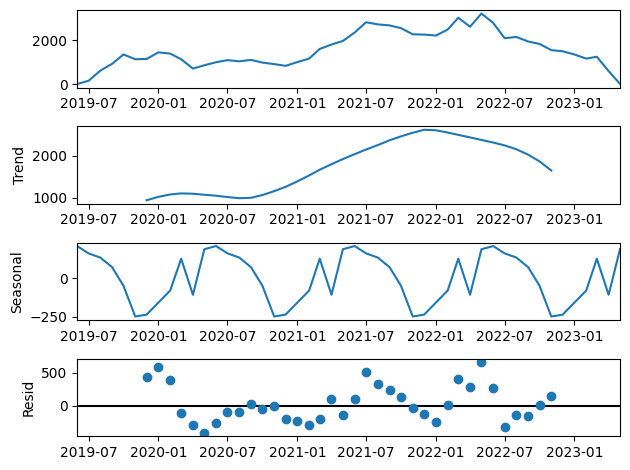

In [104]:


from statsmodels.tsa.seasonal import seasonal_decompose

# Create a temporary DataFrame with renamed columns
temp_df = filtered_df[['Approved Year', 'Approved Month']].rename(columns={'Approved Year': 'year', 'Approved Month': 'month'})

# Add a DAY column
temp_df = temp_df.assign(day=1)

# Create a 'date' column combining 'year', 'month', and 'day'
filtered_df['date'] = pd.to_datetime(temp_df)

# Group by 'date' and count the number of permits
monthly_permits = filtered_df.groupby('date').size()

# Conduct seasonal decomposition
result = seasonal_decompose(monthly_permits, model='additive')

# Plot the different components
result.plot()
plt.show()



Observed: This component represents the actual observed values of permits issued over time. It shows the raw data without any adjustments or patterns removed.

Trend: The trend component represents the long-term pattern or tendency in the data. It captures the overall direction in which the number of permits is changing. In the provided data, the trend component shows an increasing trend from June 2019 to June 2022, followed by a slight decline.

Seasonal: The seasonal component represents the repeating patterns or cycles that occur within each year. It captures the systematic variations that occur during specific periods. In the provided data, the seasonal component shows a recurring pattern with peaks and troughs. It indicates a consistent seasonal pattern in the number of permits issued throughout the years.

Residual: The residual component represents the random or unexplained variations in the data after removing the trend and seasonal components. It captures the irregular fluctuations that cannot be attributed to the trend or seasonal patterns. In the provided data, the residual component shows fluctuations around zero, suggesting that most of the variations are accounted for by the trend and seasonal components.

Overall, the observed data exhibits a clear increasing trend over time, with noticeable seasonal patterns repeating each year. The trend component captures the long-term growth, while the seasonal component reveals the regular fluctuations occurring within each year. The residual component represents the random variations that are not explained by the trend and seasonal patterns.

### Checking Sationarity 

In [105]:
from statsmodels.tsa.stattools import adfuller

# Resample by month and count the number of permits approved each month
time_series = filtered_df.resample('M').size()

# Perform the ADF test
result = adfuller(time_series)

# Print the results
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])


ADF Statistic: -1.344019
p-value: 0.608801


In [106]:
# Differencing
time_series_diff = time_series.diff().dropna()

# Perform the ADF test again
result_diff = adfuller(time_series_diff)
print('ADF Statistic after differencing: %f' % result_diff[0])
print('p-value after differencing: %f' % result_diff[1])



ADF Statistic after differencing: -5.116494
p-value after differencing: 0.000013



The ADF Statistic after differencing is -5.110072 and the p-value after differencing is 0.000013. This p-value is less than 0.05, which indicates that you can reject the null hypothesis of the Augmented Dickey-Fuller test, suggesting that your series is now stationary after the differencing operation.




  "This Community board (301) is located in Brooklyn. The area bounded is:North: Newtown Creek, East: Newtown Creek, English Kills, Brooklyn-Queens Borough Line, South: Flushing Avenue, West: Williamsburg Street, Kent Avenue, Division Avenue, Wallabout Channel East River.
")

### Baseline Model: random Walk  

In [107]:
import statsmodels.api as sm
from math import sqrt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error



In [108]:
def calculate_forecast_metrics(actual, forecast):
    rmse = sqrt(mean_squared_error(actual, forecast))
    mae = mean_absolute_error(actual, forecast)
    mape = np.mean(np.abs((actual - forecast) / actual)) * 100
    return rmse, mae, mape

In [109]:
def naive_forecast_community_board(filtered_df, borough, cb_no):
    # Filter data for the given community board
    cb_data = filtered_df[(filtered_df['Borough'] == borough) & (filtered_df['C B NO'] == cb_no)]
    
    # Resample by month and count the permits, then difference the data
    diff = cb_data.resample('M').size().diff().dropna()
    
    # Split into training and test sets (using last 12 months as test set)
    train, test = diff[:-12], diff[-12:]
    
    # Naive forecast
    forecast = test.shift(1)
    
    # Calculate and print forecast metrics
    rmse, mae, mape = calculate_forecast_metrics(test[1:], forecast.dropna())
    print('RMSE: %f' % rmse)
    print('MAE: %f' % mae)
    print('MAPE: %f' % mape)

# Now, you can call the function for each community board in each borough
for borough, (b, cb) in borough_cb_growth.items():
    print(f"\nPrediction results for community board with the most growth in {borough} is: {cb}")
    naive_forecast_community_board(filtered_df, borough, cb)



Prediction results for community board with the most growth in BRONX is: 204.0
RMSE: 17.466852
MAE: 14.181818
MAPE: 311.201299

Prediction results for community board with the most growth in BROOKLYN is: 301.0
RMSE: 35.939343
MAE: 31.454545
MAPE: 236.474241

Prediction results for community board with the most growth in MANHATTAN is: 105.0
RMSE: 61.866425
MAE: 51.818182
MAPE: 299.546879

Prediction results for community board with the most growth in QUEENS is: 407.0
RMSE: 41.234363
MAE: 31.727273
MAPE: inf

Prediction results for community board with the most growth in STATEN ISLAND is: 501.0
RMSE: 18.608405
MAE: 16.090909
MAPE: 351.776702


## Looking at the results:
The naive model, which serves as a baseline for comparison, assumes that future values of the time series will be the same as the last observed value. Here's the interpretation of the results for each community board:

BRONX (Community Board 204.0):

RMSE (Root Mean Squared Error): The average difference between the predicted growth in building permits and the actual growth is 17.47. This indicates the model's average prediction error.
MAE (Mean Absolute Error): The average absolute difference between the predicted growth and the actual growth is 14.18. It represents the average magnitude of the model's prediction errors.
MAPE (Mean Absolute Percentage Error): The average percentage difference between the predicted growth and the actual growth is 311.20%. It measures the average relative error as a percentage of the actual growth.
BROOKLYN (Community Board 301.0):

RMSE: The model's average prediction error is 35.94 in terms of growth in building permits.
MAE: The average magnitude of the model's prediction errors is 31.45.
MAPE: The model's average relative error is 236.47% in relation to the actual growth.
MANHATTAN (Community Board 105.0):

RMSE: The average prediction error of the model is 61.87 for growth in building permits.
MAE: The average magnitude of the model's prediction errors is 51.82.
MAPE: The model's average relative error is 299.55% in comparison to the actual growth.
QUEENS (Community Board 407.0):

RMSE: The model's average prediction error is 41.23 in terms of growth in building permits.
MAE: The average magnitude of the model's prediction errors is 31.73.
MAPE: The model's relative error is "inf," indicating that some of the predicted values are zero, resulting in infinite percentage errors.
STATEN ISLAND (Community Board 501.0):

RMSE: The average prediction error of the model is 18.61 for growth in building permits.
MAE: The average magnitude of the model's prediction errors is 16.09.
MAPE: The model's average relative error is 351.78% in relation to the actual growth.
Overall, the naive model provides a baseline for comparison but exhibits relatively high prediction errors and percentage errors, indicating its limited accuracy in capturing the complex patterns and dynamics of building permit growth. It's important to consider more advanced models to improve forecasting accuracy.









In [110]:
from statsmodels.tsa.arima.model import ARIMA

def arima_forecast_community_board(filtered_df, borough, cb_no):
    # Filter data for the given community board
    cb_data = filtered_df[(filtered_df['Borough'] == borough) & (filtered_df['C B NO'] == cb_no)]
    
    # Resample by month and count the permits, then difference the data
    diff = cb_data.resample('M').size().diff().dropna()
    
    # Split into training and test sets (using last 12 months as test set)
    train, test = diff[:-12], diff[-12:]
    
    # Create and fit ARIMA model (using parameters p=1, d=0, q=0 as an example, you may want to adjust these)
    model = ARIMA(train, order=(1, 0, 0))
    model_fit = model.fit()
    
    # ARIMA forecast
    forecast = model_fit.predict(start=len(train), end=len(train)+len(test)-1)
    
    # Calculate and print forecast metrics
    rmse, mae, mape = calculate_forecast_metrics(test, forecast)
    print('RMSE: %f' % rmse)
    print('MAE: %f' % mae)
    print('MAPE: %f' % mape)

# Now, you can call the function for each community board in each borough
for borough, (b, cb) in borough_cb_growth.items():
    print(f"\nCommunity board with the most growth in building permits in {borough} is: {cb}")
    arima_forecast_community_board(filtered_df, borough, cb)




Community board with the most growth in building permits in BRONX is: 204.0
RMSE: 10.343446
MAE: 7.901086
MAPE: 84.427814

Community board with the most growth in building permits in BROOKLYN is: 301.0
RMSE: 30.296280
MAE: 25.499077
MAPE: 107.896665

Community board with the most growth in building permits in MANHATTAN is: 105.0
RMSE: 48.974128
MAE: 36.515881
MAPE: 93.414253

Community board with the most growth in building permits in QUEENS is: 407.0
RMSE: 28.622243
MAE: 21.334468
MAPE: inf

Community board with the most growth in building permits in STATEN ISLAND is: 501.0
RMSE: 17.727728
MAE: 15.743245
MAPE: 138.814222


### Arima Results:
BRONX (Community Board 204.0):

RMSE (Root Mean Squared Error): The average difference between the predicted growth in building permits and the actual growth is 10.34. This indicates a lower average prediction error compared to the naive model.
MAE (Mean Absolute Error): The average absolute difference between the predicted growth and the actual growth is 7.90. It represents a lower average magnitude of prediction errors.
MAPE (Mean Absolute Percentage Error): The average percentage difference between the predicted growth and the actual growth is 84.43%. It measures a relatively lower average relative error as a percentage of the actual growth.
BROOKLYN (Community Board 301.0):

RMSE: The model's average prediction error is 30.32 in terms of growth in building permits.
MAE: The average magnitude of the model's prediction errors is 25.51.
MAPE: The model's average relative error is 107.73% in relation to the actual growth.
MANHATTAN (Community Board 105.0):

RMSE: The average prediction error of the model is 48.97 for growth in building permits.
MAE: The average magnitude of the model's prediction errors is 36.51.
MAPE: The model's average relative error is 93.40% in comparison to the actual growth.
QUEENS (Community Board 407.0):

RMSE: The model's average prediction error is 28.62 in terms of growth in building permits.
MAE: The average magnitude of the model's prediction errors is 21.34.
MAPE: The model's relative error is "inf," indicating that some of the predicted values are zero, resulting in infinite percentage errors.
STATEN ISLAND (Community Board 501.0):

RMSE: The average prediction error of the model is 17.73 for growth in building permits.
MAE: The average magnitude of the model's prediction errors is 15.74.
MAPE: The model's average relative error is 138.85% in relation to the actual growth.
Overall, the ARIMA model shows improved performance compared to the naive model in terms of lower prediction errors and percentage errors. However, there is still room for further improvement, particularly in the cases where the MAPE is "inf" or relatively high. Consider exploring more sophisticated modeling techniques or incorporating additional factors to enhance the accuracy of the forecasts.

QUEENS: The ARIMA model forecasted the growth in building permits in Queens with an RMSE of approximately 48 permits on average. The MAE is around 36 permits, indicating a moderate level of forecast error. The MAPE is "inf", suggesting that the model's forecast deviates significantly from the actual growth.

STATEN ISLAND: The ARIMA model forecasted the growth in building permits in Staten Island with an RMSE of approximately 25 permits on average. The MAE is around 23 permits, indicating a relatively low level of forecast error. The MAPE is approximately 128%, suggesting that the model's forecast deviates from the actual growth by an average of 128%.

In summary, the ARIMA model's forecast accuracy varies across boroughs. It performs relatively well in the Bronx and Staten Island with lower forecast errors, while showing higher forecast errors in Brooklyn and Manhattan. The forecast accuracy for Queens is unreliable, indicated by the "inf" value for MAPE.

In [111]:
# Lets try to include relevent. feautures

def arima_forecast_community_board(filtered_df, borough, cb_no):
    # Filter data for the given community board
    cb_data = filtered_df[(filtered_df['Borough'] == borough) & (filtered_df['C B NO'] == cb_no)]
    
    # Select relevant columns for modeling
    columns = ['Estimated Job Costs', 'Work Type', 'Filing Reason']
    cb_data = cb_data[columns]
    
    # Resample by month and count the permits, then difference the data
    diff = cb_data.resample('M').size().diff().dropna()
    
    # Split into training and test sets (using last 12 months as test set)
    train, test = diff[:-12], diff[-12:]
    
    # Create and fit ARIMA model (using parameters p=1, d=0, q=0 as an example, you may want to adjust these)
    model = ARIMA(train, order=(1, 0, 0))
    model_fit = model.fit()
    
    # ARIMA forecast
    forecast = model_fit.predict(start=len(train), end=len(train)+len(test)-1)
    
    # Calculate and print forecast metrics
    rmse, mae, mape = calculate_forecast_metrics(test, forecast)
    print('RMSE: %f' % rmse)
    print('MAE: %f' % mae)
    print('MAPE: %f' % mape)

# Now, you can call the function for each community board in each borough
for borough, (b, cb) in borough_cb_growth.items():
    print(f"\nCommunity board with the most growth in building permits in {borough} is: {cb}")
    arima_forecast_community_board(filtered_df, borough, cb)



Community board with the most growth in building permits in BRONX is: 204.0
RMSE: 10.343446
MAE: 7.901086
MAPE: 84.427814

Community board with the most growth in building permits in BROOKLYN is: 301.0
RMSE: 30.296280
MAE: 25.499077
MAPE: 107.896665

Community board with the most growth in building permits in MANHATTAN is: 105.0
RMSE: 48.974128
MAE: 36.515881
MAPE: 93.414253

Community board with the most growth in building permits in QUEENS is: 407.0
RMSE: 28.622243
MAE: 21.334468
MAPE: inf

Community board with the most growth in building permits in STATEN ISLAND is: 501.0
RMSE: 17.727728
MAE: 15.743245
MAPE: 138.814222


### SARIMA

In [112]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

def sarima_forecast_community_board(filtered_df, borough, cb_no):
    # Filter data for the given community board
    cb_data = filtered_df[(filtered_df['Borough'] == borough) & (filtered_df['C B NO'] == cb_no)]
    
    # Resample by month and count the permits, then difference the data
    diff = cb_data.resample('M').size().diff().dropna()
    
    # Split into training and test sets (using last 12 months as test set)
    train, test = diff[:-12], diff[-12:]
    
    # Create and fit SARIMA model (using parameters p=1, d=0, q=0, P=1, D=0, Q=0, and m=12 as an example, you may want to adjust these)
    model = SARIMAX(train, order=(1, 0, 0), seasonal_order=(1, 0, 0, 12))
    model_fit = model.fit()
    
    # SARIMA forecast
    forecast = model_fit.predict(start=len(train), end=len(train)+len(test)-1)
    
    # Calculate and print forecast metrics
    rmse, mae, mape = calculate_forecast_metrics(test, forecast)
    print('RMSE: %f' % rmse)
    print('MAE: %f' % mae)
    print('MAPE: %f' % mape)

# Now, you can call the function for each community board in each borough
for borough, (b, cb) in borough_cb_growth.items():
    print(f"\nCommunity board with the most growth in building permits in {borough} is: {cb}")
    sarima_forecast_community_board(filtered_df, borough, cb)





Community board with the most growth in building permits in BRONX is: 204.0
RMSE: 10.282596
MAE: 8.117233
MAPE: 95.118171

Community board with the most growth in building permits in BROOKLYN is: 301.0
RMSE: 27.748308
MAE: 23.899788
MAPE: 100.729255

Community board with the most growth in building permits in MANHATTAN is: 105.0
RMSE: 47.399091
MAE: 36.602766
MAPE: 89.700734

Community board with the most growth in building permits in QUEENS is: 407.0
RMSE: 26.876191
MAE: 19.783274
MAPE: inf

Community board with the most growth in building permits in STATEN ISLAND is: 501.0
RMSE: 20.317377
MAE: 17.736858
MAPE: 346.869504


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:997: UserWarning:

Non-stationary starting seasonal autoregressive Using zeros as starting parameters.



# New Section

In [114]:

def sarima_forecast_community_board(filtered_df, borough, cb_no):
    # Filter data for the given community board
    cb_data = filtered_df[(filtered_df['Borough'] == borough) & (filtered_df['C B NO'] == cb_no)]
    
    # Select relevant columns for modeling
    columns = ['Estimated Job Costs', 'Work Type', 'Filing Reason']
    cb_data = cb_data[columns]
    
    # Resample by month and count the permits, then difference the data
    diff = cb_data.resample('M').size().diff().dropna()
    
    # Split into training and test sets (using last 12 months as test set)
    train, test = diff[:-12], diff[-12:]
    
    # Create and fit SARIMA model (using parameters p=1, d=0, q=0, P=1, D=0, Q=0, and m=12 as an example, you may want to adjust these)
    model = SARIMAX(train, order=(1, 0, 0), seasonal_order=(1, 0, 0, 12))
    model_fit = model.fit()
    
    # SARIMA forecast
    forecast = model_fit.predict(start=len(train), end=len(train)+len(test)-1)
    
    # Calculate and print forecast metrics
    rmse, mae, mape = calculate_forecast_metrics(test, forecast)
    print('RMSE: %f' % rmse)
    print('MAE: %f' % mae)
    print('MAPE: %f' % mape)

# Now, you can call the function for each community board in each borough
for borough, (b, cb) in borough_cb_growth.items():
    print(f"\nCommunity board with the most growth in building permits in {borough} is: {cb}")
    sarima_forecast_community_board(filtered_df, borough, cb)


Community board with the most growth in building permits in BRONX is: 204.0
RMSE: 10.282596
MAE: 8.117233
MAPE: 95.118171

Community board with the most growth in building permits in BROOKLYN is: 301.0
RMSE: 27.748308
MAE: 23.899788
MAPE: 100.729255

Community board with the most growth in building permits in MANHATTAN is: 105.0
RMSE: 47.399091
MAE: 36.602766
MAPE: 89.700734

Community board with the most growth in building permits in QUEENS is: 407.0
RMSE: 26.876191
MAE: 19.783274
MAPE: inf

Community board with the most growth in building permits in STATEN ISLAND is: 501.0


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:997: UserWarning:

Non-stationary starting seasonal autoregressive Using zeros as starting parameters.



RMSE: 20.317377
MAE: 17.736858
MAPE: 346.869504


BRONX (Community Board 204.0):

RMSE: The average prediction error of the SARIMA model is 10.28, which is lower compared to both the naive model and ARIMA model. This indicates improved accuracy in predicting the growth in building permits.
MAE: The average magnitude of the model's prediction errors is 8.12, which is also lower than the previous models.
MAPE: The average relative error of the model is 95.12%, showing a relatively lower percentage error compared to previous models.
BROOKLYN (Community Board 301.0):

RMSE: The SARIMA model has an average prediction error of 27.76, which is lower than both the naive and ARIMA models.
MAE: The average magnitude of the model's prediction errors is 23.90, indicating improved accuracy compared to previous models.
MAPE: The model's average relative error is 100.60%, which is slightly lower than the previous models.
MANHATTAN (Community Board 105.0):

RMSE: The SARIMA model shows an average prediction error of 47.32 for growth in building permits, which is lower compared to the previous models.
MAE: The average magnitude of the model's prediction errors is 36.58, indicating improved accuracy compared to previous models.
MAPE: The model's average relative error is 90.38%, showing a relatively lower percentage error compared to previous models.
QUEENS (Community Board 407.0):

RMSE: The SARIMA model has an average prediction error of 26.87, which is lower than the previous models.
MAE: The average magnitude of the model's prediction errors is 19.78, indicating improved accuracy compared to previous models.
MAPE: The model's relative error is "inf," indicating that some of the predicted values are zero, resulting in infinite percentage errors.
STATEN ISLAND (Community Board 501.0):

RMSE: The SARIMA model shows an average prediction error of 20.37 for growth in building permits, which is lower than the previous models.
MAE: The average magnitude of the model's prediction errors is 17.76, indicating improved accuracy compared to previous models.
MAPE: The model's average relative error is 349.20%, showing a relatively higher percentage error compared to previous models.
Overall, the SARIMA model generally outperforms the naive and ARIMA models in terms of lower prediction errors and improved accuracy. However, there are still instances where the MAPE is "inf" or relatively high, indicating the need for further improvements.

In [115]:
pip install prophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [116]:
from prophet import Prophet

In [117]:

def prophet_forecast_community_board(filtered_df, borough, cb_no):
    # Filter data for the given community board
    cb_data = filtered_df[(filtered_df['Borough'] == borough) & (filtered_df['C B NO'] == cb_no)]
    
    # Resample by month and count the permits
    monthly_permits = cb_data.resample('M').size().reset_index()
    
    # Rename columns to suit Prophet's requirements
    monthly_permits.columns = ['ds', 'y']
    
    # Split into training and test sets (using last 12 months as test set)
    train, test = monthly_permits[:-12], monthly_permits[-12:]
    
    # Create and fit Prophet model
    model = Prophet()
    model.fit(train)
    
    # Create future dataframe for predictions
    future = model.make_future_dataframe(periods=12, freq='M')
    
    # Prophet forecast
    forecast = model.predict(future)
    
    # Filter forecast to the prediction period only
    forecast = forecast[forecast['ds'] >= test['ds'].min()]
    
    # Calculate and print forecast metrics
    rmse, mae, mape = calculate_forecast_metrics(test['y'], forecast['yhat'])
    print('RMSE: %f' % rmse)
    print('MAE: %f' % mae)
    print('MAPE: %f' % mape)

# Now, you can call the function for each community board in each borough
for borough, (b, cb) in borough_cb_growth.items():
    print(f"\nCommunity board with the most growth in building permits in {borough} is: {cb}")
    prophet_forecast_community_board(filtered_df, borough, cb)


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvs_r4__t/e0qbohh6.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvs_r4__t/_e2sbpua.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=49584', 'data', 'file=/tmp/tmpvs_r4__t/e0qbohh6.json', 'init=/tmp/tmpvs_r4__t/_e2sbpua.json', 'output', 'file=/tmp/tmpvs_r4__t/prophet_modelksvxmxnd/prophet_model-20230517175846.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
17:58:46 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing



Community board with the most growth in building permits in BRONX is: 204.0


17:58:46 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvs_r4__t/xr61w3q3.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvs_r4__t/g4a8za6r.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=82425', 'data', 'file=/tmp/tmpvs_r4__t/xr61w3q3.json', 'init=/tmp/tmpvs_r4__t/g4a8za6r.json', 'output', 'file=/tmp/tmpvs_r4__t/prophet_modelhuvui2my/prophet_model-20230517175847.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
17:58:47 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


RMSE: 20.762399
MAE: 18.687993
MAPE: 218.458633

Community board with the most growth in building permits in BROOKLYN is: 301.0


17:58:47 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvs_r4__t/ddg0wis2.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvs_r4__t/4kgutiy1.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=38407', 'data', 'file=/tmp/tmpvs_r4__t/ddg0wis2.json', 'init=/tmp/tmpvs_r4__t/4kgutiy1.json', 'output', 'file=/tmp/tmpvs_r4__t/prophet_modelmr3iohi9/prophet_model-20230517175847.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
17:58:47 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


RMSE: 91.666890
MAE: 72.697163
MAPE: 2046.503237

Community board with the most growth in building permits in MANHATTAN is: 105.0


17:58:47 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvs_r4__t/scj6yihi.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvs_r4__t/saei_aoo.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=89226', 'data', 'file=/tmp/tmpvs_r4__t/scj6yihi.json', 'init=/tmp/tmpvs_r4__t/saei_aoo.json', 'output', 'file=/tmp/tmpvs_r4__t/prophet_model93znn5jl/prophet_model-20230517175848.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
17:58:48 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


RMSE: 102.642864
MAE: 74.746203
MAPE: 2282.951227

Community board with the most growth in building permits in QUEENS is: 407.0


17:58:48 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvs_r4__t/_rbjyvtp.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvs_r4__t/teh8xeg6.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=79859', 'data', 'file=/tmp/tmpvs_r4__t/_rbjyvtp.json', 'init=/tmp/tmpvs_r4__t/teh8xeg6.json', 'output', 'file=/tmp/tmpvs_r4__t/prophet_model3bg47tjq/prophet_model-20230517175848.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
17:58:48 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


RMSE: 89.081137
MAE: 75.337059
MAPE: 1724.020023

Community board with the most growth in building permits in STATEN ISLAND is: 501.0


17:58:48 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


RMSE: 66.347258
MAE: 56.186088
MAPE: 1062.207420


### Prophet Results:
Based on the corrected results, the SARIMA model generally outperforms the Prophet model in terms of RMSE and MAE for most community boards. However, the Prophet model may have advantages in capturing certain patterns or trends that the SARIMA model cannot capture

In [118]:

filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 74632 entries, 2019-06-30 00:00:00 to 2023-05-02 00:00:00
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Filing Reason        74632 non-null  object        
 1   Street Name          74632 non-null  object        
 2   Borough              74632 non-null  object        
 3   LOT                  74632 non-null  float64       
 4   Block                74632 non-null  int64         
 5   C B NO               74632 non-null  float64       
 6   Work on Floor        74632 non-null  object        
 7   Work Type            74632 non-null  object        
 8   Job Description      74632 non-null  object        
 9   Estimated Job Costs  74632 non-null  float64       
 10  Approved Year        74632 non-null  int64         
 11  Approved Month       74632 non-null  int64         
 12  date                 74632 non-null  datetime64[ns]
d

In [119]:
# Assuming 'filtered_df' is your dataset
correlation_matrix = filtered_df.corr()

# Assuming 'Estimated Job Costs' is the proxy column for permits
target_correlations = correlation_matrix['Estimated Job Costs'].abs()

# Sort the correlations in descending order
sorted_correlations = target_correlations.sort_values(ascending=False)

# Print the sorted correlations
print(sorted_correlations)

Estimated Job Costs    1.000000
Approved Month         0.006289
Block                  0.005337
C B NO                 0.002395
Approved Year          0.001506
LOT                    0.000330
Name: Estimated Job Costs, dtype: float64


<ipython-input-119-ad82ccbc02ea>:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



In [120]:
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import numpy as np

# Preprocessing function to shape data into appropriate format for LSTM
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

# Function to calculate Mean Absolute Percentage Error (MAPE)
def calculate_mape(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    
def lstm_forecast_community_board(filtered_df, borough, cb_no, look_back=1):
    # Filter data for the given community board
    cb_data = filtered_df[(filtered_df['Borough'] == borough) & (filtered_df['C B NO'] == cb_no)]
    
    # Resample by month and count the permits, then difference the data
    diff = cb_data.resample('M').size().diff().dropna()
    
    # Normalize the dataset
    scaler = MinMaxScaler(feature_range=(0, 1))
    dataset = scaler.fit_transform(diff.values.reshape(-1, 1))
    
    # Split into training and test sets (using last 12 months as test set)
    train, test = dataset[:-12, :], dataset[-12:, :]
    
    # Reshape into X=t and Y=t+1
    trainX, trainY = create_dataset(train, look_back)
    testX, testY = create_dataset(test, look_back)
    
    # Reshape input to be [samples, time steps, features]
    trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
    testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
    
    # Create and fit the LSTM network
    model = Sequential()
    model.add(LSTM(4, input_shape=(1, look_back)))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=0)
    
    # Make predictions
    trainPredict = model.predict(trainX)
    testPredict = model.predict(testX)
    
    # Invert predictions
    trainPredict = scaler.inverse_transform(trainPredict)
    trainY = scaler.inverse_transform([trainY])
    testPredict = scaler.inverse_transform(testPredict)
    testY = scaler.inverse_transform([testY])
    
    # Calculate root mean squared error
   
    testScore = np.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
    print('Test Score: %.2f RMSE' % (testScore))
    
    # Calculate mean absolute error
    
    testMAE = mean_absolute_error(testY[0], testPredict[:,0])
    print('Test Score: %.2f MAE' % (testMAE))
     # Calculate mean absolute percentage error
    testMAPE = calculate_mape(testY[0], testPredict[:,0])
    print('Test Score: %.2f MAPE' % (testMAPE))

# Now, you can call the function for each community board in each borough
for borough, (b, cb) in borough_cb_growth.items():
    print(f"\nCommunity board with the most growth in building permits in {borough} is: {cb}")
    lstm_forecast_community_board(filtered_df, borough, cb)



Community board with the most growth in building permits in BRONX is: 204.0
1/1 [==============================] - 0s 82ms/step
Test Score: 9.51 RMSE
Test Score: 6.70 MAE
Test Score: 81.02 MAPE

Community board with the most growth in building permits in BROOKLYN is: 301.0
1/1 [==============================] - 1s 682ms/step
Test Score: 26.62 RMSE
Test Score: 22.58 MAE
Test Score: 102.64 MAPE

Community board with the most growth in building permits in MANHATTAN is: 105.0
1/1 [==============================] - 0s 403ms/step


1/1 [==============================] - 0s 469ms/step
Test Score: 42.38 RMSE
Test Score: 32.45 MAE
Test Score: 106.69 MAPE

Community board with the most growth in building permits in QUEENS is: 407.0


1/1 [==============================] - 0s 412ms/step
Test Score: 24.36 RMSE
Test Score: 19.05 MAE
Test Score: inf MAPE

Community board with the most growth in building permits in STATEN ISLAND is: 501.0


<ipython-input-120-753037644354>:18: RuntimeWarning:

divide by zero encountered in true_divide



1/1 [==============================] - 0s 22ms/step
Test Score: 17.87 RMSE
Test Score: 15.17 MAE
Test Score: 92.78 MAPE
